In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
train_data = pd.read_excel("train_data.xlsx")

In [17]:
train_data.head()

,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
0,10608026,2014-01-01,C5,36 months,MORTGAGE,665,9,70000.0,16.24,debt_consolidation,7200,Individual,253.99,Verified,4648,11,0
1,10235120,2014-01-01,E5,36 months,MORTGAGE,660,8,65000.0,23.40,home_improvement,6000,Individual,233.52,Source Verified,14051,11,1
2,10705805,2014-01-01,D2,36 months,MORTGAGE,660,7,73000.0,17.57,other,8000,Individual,287.50,Verified,14885,11,0
3,11044991,2014-01-01,B4,36 months,MORTGAGE,690,5,118000.0,12.85,debt_consolidation,10000,Individual,336.22,Source Verified,7542,2,1
4,10161054,2014-01-01,C3,60 months,MORTGAGE,665,5,63000.0,14.98,debt_consolidation,10000,Individual,237.80,Verified,6318,11,0


In [35]:
sns.set_style("whitegrid")

# 1. Basic statistics and data types
print("Dataset Info:")
print(train_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113705 entries, 0 to 113704
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   customer_id          113705 non-null  int64         
 1   transaction_date     113705 non-null  datetime64[ns]
 2   sub_grade            113705 non-null  object        
 3   term                 113705 non-null  object        
 4   home_ownership       113705 non-null  object        
 5   cibil_score          113705 non-null  int64         
 6   total_no_of_acc      113705 non-null  int64         
 7   annual_inc           113705 non-null  float64       
 8   int_rate             113705 non-null  float64       
 9   purpose              113705 non-null  object        
 10  loan_amnt            113705 non-null  int64         
 11  application_type     113705 non-null  object        
 12  installment          113705 non-null  float64       
 13  

##### The dataset contains 113705 rows and 17 columns.

In [26]:
train_data['cibil_score'].unique()

array([665, 660, 690, 680, 675, 670, 700, 695, 710, 715, 685, 720, 705,
       735, 740, 730, 725, 760, 750, 800, 745, 795, 765, 755, 770, 785,
       780, 775, 805, 830, 790, 810, 820, 835, 825, 845, 815, 840],
      dtype=int64)

In [27]:
train_data['loan_status'].unique()

array([0, 1], dtype=int64)

In [ ]:
train_data['annual_inc'].unique() # We have to normalize this as there are values that will be drifting so much from the mean

array([ 70000.  ,  65000.  ,  73000.  , ..., 106745.  , 136000.02,
        56275.  ])

In [36]:
# Calculate mean, variance, and standard deviation
mean_annual_inc = train_data['annual_inc'].mean()
variance_annual_inc = train_data['annual_inc'].var()
std_annual_inc = train_data['annual_inc'].std()

# Print the results
print(f"Mean Annual Income: {mean_annual_inc}")
print(f"Variance of Annual Income: {variance_annual_inc}")
print(f"Standard Deviation of Annual Income: {std_annual_inc}")


Mean Annual Income: 71388.21860938393
Variance of Annual Income: 3660994910.2423167
Standard Deviation of Annual Income: 60506.15596980457


### The large standard deviation and variance highlight that the income distribution is wide, with both low and high earners in the dataset.
### Since the standard deviation is close to the mean, there might be some extreme outliers (very high-income applicants) skewing the data.
### We have to Normalize this

In [ ]:
train_data['loan_amnt'].unique()  # We have to normalize this as there are values that will be drifting so much from the mean

array([ 7200,  6000,  8000, ..., 38400, 32575, 39700], dtype=int64)

In [39]:
# Calculate mean, variance, and standard deviation
mean_annual_inc = train_data['loan_amnt'].mean()
variance_annual_inc = train_data['loan_amnt'].var()
std_annual_inc = train_data['loan_amnt'].std()

# Print the results
print(f"Mean loan amount: {mean_annual_inc}")
print(f"Variance of loan amount: {variance_annual_inc}")
print(f"Standard Deviation of loan amount: {std_annual_inc}")


Mean loan amount: 15158.14498043182
Variance of loan amount: 82651369.33269717
Standard Deviation of loan amount: 9091.279851192414


### A significant proportion of applicants borrow loans in the small-to-mid range.
#### Some outliers with large loan amounts likely exist, as indicated by the large variance and standard deviation.
#### we have to normalize this

In [19]:
print("\nSummary Statistics:")
train_data.describe(include='all')


Summary Statistics:


,customer_id,transaction_date,sub_grade,term,home_ownership,cibil_score,total_no_of_acc,annual_inc,int_rate,purpose,loan_amnt,application_type,installment,verification_status,account_bal,emp_length,loan_status
count,1.137050e+05,113705,113705,113705,113705,113705.000000,113705.000000,1.137050e+05,113705.000000,113705,113705.000000,113705,113705.000000,113705,113705.000000,113705.000000,113705.000000
unique,NaN,NaN,27,2,3,NaN,NaN,NaN,NaN,13,NaN,2,NaN,3,NaN,NaN,NaN
top,NaN,NaN,C2,36 months,MORTGAGE,NaN,NaN,NaN,NaN,debt_consolidation,NaN,Individual,NaN,Source Verified,NaN,NaN,NaN
freq,NaN,NaN,12549,71625,53462,NaN,NaN,NaN,NaN,71770,NaN,113259,NaN,48981,NaN,NaN,NaN
mean,4.359137e+07,2015-03-04 22:24:20.769535232,NaN,NaN,NaN,684.398707,0.272934,7.138822e+04,15.955469,NaN,15158.144980,NaN,454.241150,NaN,15820.487094,5.959782,0.738895
min,3.630090e+05,2014-01-01 00:00:00,NaN,NaN,NaN,660.000000,0.000000,0.000000e+00,12.050000,NaN,1000.000000,NaN,33.240000,NaN,0.000000,0.000000,0.000000
25%,2.509597e+07,2014-08-01 00:00:00,NaN,NaN,NaN,665.000000,0.000000,4.300000e+04,13.330000,NaN,8000.000000,NaN,265.740000,NaN,5656.000000,2.000000,0.000000
50%,4.504932e+07,2015-04-01 00:00:00,NaN,NaN,NaN,680.000000,0.000000,6.000000e+04,14.990000,NaN,13300.000000,NaN,388.290000,NaN,10841.000000,6.000000,1.000000
75%,6.134344e+07,2015-10-01 00:00:00,NaN,NaN,NaN,695.000000,0.000000,8.500000e+04,17.860000,NaN,20225.000000,NaN,599.530000,NaN,19682.000000,11.000000,1.000000
max,7.615383e+07,2016-03-01 00:00:00,NaN,NaN,NaN,845.000000,10.000000,8.900060e+06,28.990000,NaN,40000.000000,NaN,1460.430000,NaN,875598.000000,11.000000,1.000000


C:\Users\rahil\AppData\Local\Temp\ipykernel_1868\3489329615.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=train_data, palette='viridis')


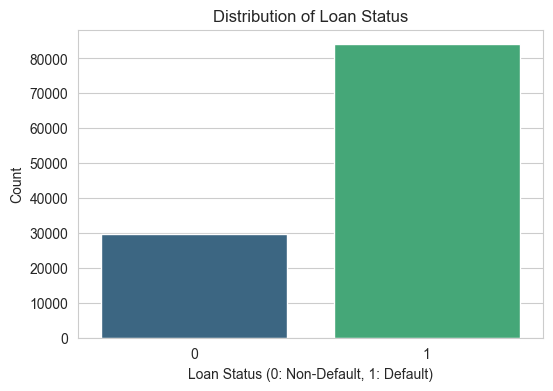

In [ ]:
#Distribution of Target Variable (loan_status)
plt.figure(figsize=(6, 4))
sns.countplot(x='loan_status', data=train_data, palette='viridis')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Count')
plt.show()

### The plot clearly shows a significant class imbalance between the two loan statuses.

### there is a need to Handle class imbalance (i did this in model_selection.ipynb)

C:\Users\rahil\AppData\Local\Temp\ipykernel_1868\2019251691.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='annual_inc', data=train_data, palette='Set2')


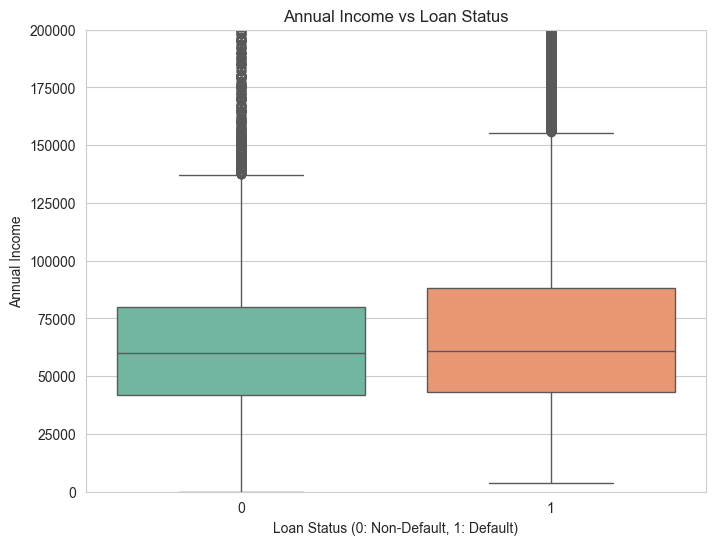

In [50]:
# Annual Income vs Loan Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='annual_inc', data=train_data, palette='Set2')
plt.ylim(0, 200000)  # Limiting the range to focus on typical values
plt.title('Annual Income vs Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('Annual Income')
plt.show()

#### The box plot suggests that income alone might not be a robust predictor of loan default.

#### The presence of high-income outliers in the non-default group could be skewing the overall distribution.
#### Further analysis without outliers might provide a clearer picture.

C:\Users\rahil\AppData\Local\Temp\ipykernel_1868\1621804726.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amnt', data=train_data, palette='Set2')


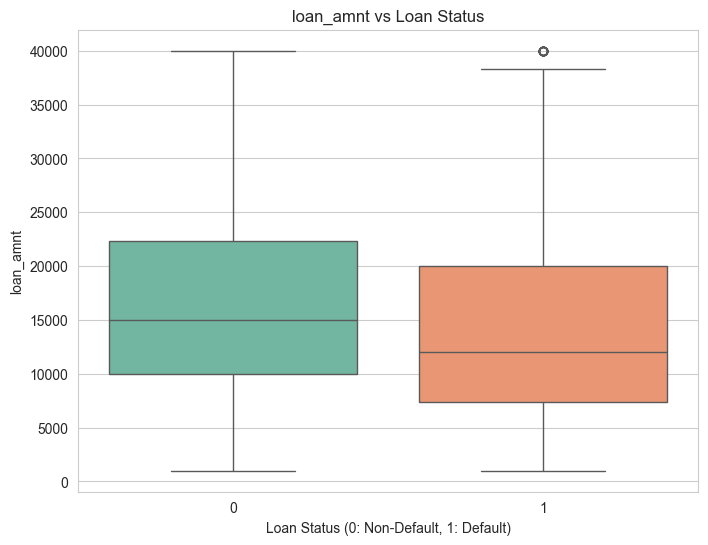

In [ ]:
# loan_amnt vs Loan Status

plt.figure(figsize=(8, 6))
sns.boxplot(x='loan_status', y='loan_amnt', data=train_data, palette='Set2')
plt.title('loan_amnt vs Loan Status')
plt.xlabel('Loan Status (0: Non-Default, 1: Default)')
plt.ylabel('loan_amnt')
plt.show()


#### The boxes for both groups overlap considerably, indicating that loan amount alone might not be a strong predictor of loan default.
#### here isn't a clear separation in loan amounts between those who default and those who don't.

#### The box plot suggests that loan amount might not be a robust predictor of loan default

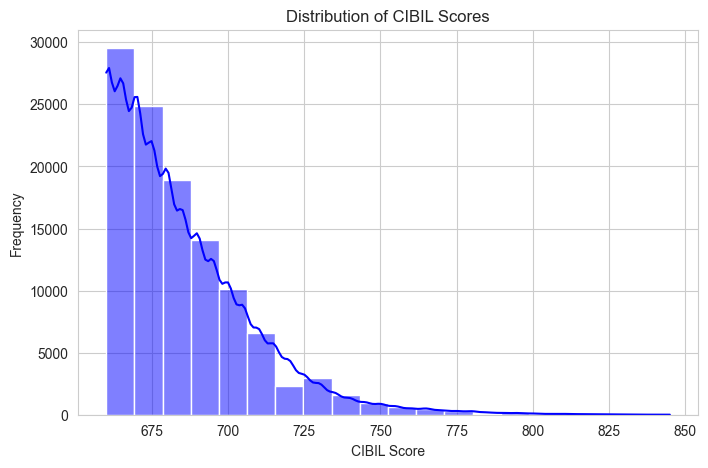

In [ ]:
# Distribution of CIBIL Scores
plt.figure(figsize=(8, 5))
sns.histplot(train_data['cibil_score'], bins=20, kde=True, color='blue')
plt.title('Distribution of CIBIL Scores')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.show()

#### The distribution appears to be left-skewed, meaning there are more individuals with higher CIBIL scores than lower ones.

#### Loan amount and annual income are weakly correlated with the target variable, indicating non-linear relationships or external influencing factors.

#### Features like cibil_score, int_rate, and account_bal show moderate correlations with loan_status

-------

### "Based on my understanding, cibil score, annual income, interest rate, loan amount are the only features that influence the target variable."
### And there is need to **Normalize** some of the features **annual income**, **loan amount**
### "In my opinion, these five features (cibil score, annual income, interest rate, loan amount, and debt-to-income ratio) are the sole determinants of the target variable.

# lests test here with heatmap

by keeping  cibil score, annual income, interest rate, loan amount and drping the rest

<Axes: >

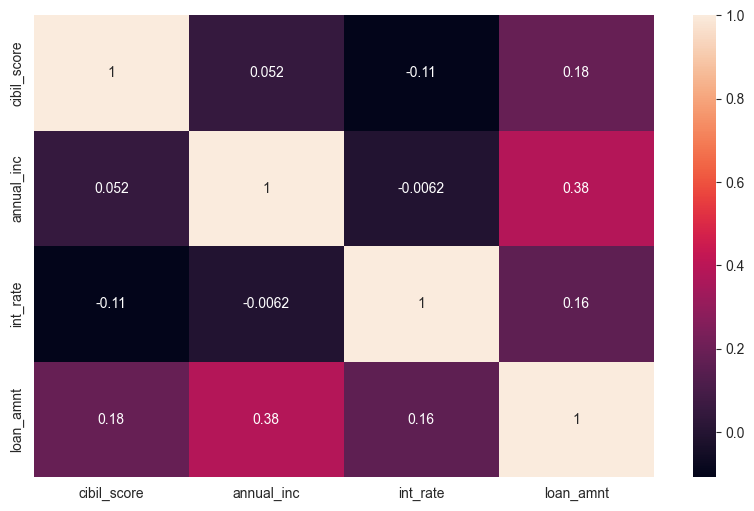

In [ ]:
train_data=train_data.drop(['loan_status', 'customer_id', 'transaction_date','term','sub_grade','home_ownership','total_no_of_acc','purpose','application_type','verification_status','installment',"account_bal","emp_length"], axis=1)
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(train_data.corr(),annot=True)

#### There appears to be a positive correlation between loan amount and interest rate, indicated by the darker shade of red. This suggests that larger loan amounts tend to be associated with higher interest rates.

#### Loan Amount and Interest Rate: The strong positive correlation between loan amount and interest rate is an important observation.

#### Hence the Selected features  **cibil score**, **annual income**, **interest rate**, **loan amount**